#Results


In [5]:
import pandas as pd
results_ = {'Approach': ['XGBoost','Fastai','Catboost','LightGBM'],
        'RSME': [0.435097,0.399569,0.2522909698,0.4238094066114889]
        }
df = pd.DataFrame(results_, columns = ['Approach', 'RSME'])
df= df.sort_values(by='RSME', ascending=True)
df.head(8)

,Approach,RSME
2,Catboost,0.252291
1,Fastai,0.399569
3,LightGBM,0.423809
0,XGBoost,0.435097


#**LightGBM-Library:**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import time
import gc
import random
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import string
import lightgbm as lgb
import datetime
%matplotlib inline

# Data Preperation

preprocessing data

In [66]:
rheindata = pd.read_csv("/content/drive/My Drive/fastai/data_rhein_incl_km(1).csv")
datum = rheindata["Date"]
list_datum = [datetime.datetime.strptime(str_,"%d.%m.%Y") for str_ in datum]

str_cols = rheindata.columns[rheindata.dtypes==object]
rheindata[str_cols] = rheindata[str_cols].fillna(rheindata.mean())
rheindata.fillna(rheindata.mean(), inplace=True)

rheindata.head()

,Unnamed: 0,Kürzel,Status Nr.,Labornummer,Jahr,Date,Datum,Dauer,Mittl.Abfluss,Abflussumme,Temp.(BAFU),pH(BAFU),Leitf. 25°C(BAFU),Sauerstoff,Sauerstoffsätt.%,Mittl.Abfluss.1,Abflussumme.1,Temp.(BAFU).1,pH(BAFU).1,Leitf. 25°C(BAFU).1,Sauerstoff.1,Sauerstoffsätt.%.1,pH (EAWAG),Leitf.20°C (EAWAG),Gesamthärte,Alkalinität,Calcium,Magnesium,Nitrit,Nitrat,Ammonium,Kjeldahl-Stickstoff,Gesamt-Stickstoff (filtriert),Gesamt-Stickstoff,DRP,Gesamt-Phosphor,Gesamt-Phosphor (filtriert),Chlorid,Kieselsäure,Sulfat,Natrium,Kalium,Eisen,Chem.Sauerstoffbedarf,TOC,DOC,Schwebstoffe,Chrom,Zink,Kupfer,Cadmium,Blei,Nickel,Quecksilber,NP,NP1EO,NP2EO,NP3EO,Calcium (IC),Rheinkilometer,Status Nr.,year,month,day,month.1,day.1
0,0,RE,7.0,16354.0,1975.0,26.05.1975,26.05.1975 11:15,168.0,430.766467,407.292802,9.928511,8.088185,317.418354,11.214118,102.47065,601.652382,363.879361,15.314631,8.089612,309.49677,11.22078,102.504947,8.0,270.0,1.46,2.32,48.0960,6.3232,0.02,0.4,0.05,0.352704,1.462609,1.184932,0.04,0.09,0.021773,4.4,3.0,29.0,4.8,1.4,0.04,9.229592,2.6,1.4,11.0,0.5,5.0,0.5,0.1,0.5,0.932912,0.027857,3.430991,0.477681,0.422033,0.0416,45.606093,90.0,1.265385,1975,5,26,5,26
1,1,RE,1.0,16487.0,1975.0,02.06.1975,02.06.1975 11:45,169.0,683.000000,415.537200,13.700000,8.088185,317.418354,11.214118,102.47065,683.280609,415.707923,13.832610,8.089612,309.49677,11.22078,102.504947,8.2,280.0,1.50,2.32,50.5008,5.8368,0.03,0.7,0.03,0.352704,1.462609,1.184932,0.07,0.18,0.021773,5.6,3.0,30.0,4.7,1.3,0.09,9.229592,2.2,1.8,6.5,0.5,10.0,2.0,0.1,1.0,0.932912,0.027857,3.430991,0.477681,0.422033,0.0416,45.606093,90.0,1.265385,1975,6,2,6,2
2,2,RE,4.0,16619.0,1975.0,09.06.1975,09.06.1975 10:40,167.0,680.000000,408.816000,13.400000,8.088185,317.418354,11.214118,102.47065,680.229844,408.954182,13.230639,8.089612,309.49677,11.22078,102.504947,8.1,290.0,1.52,2.60,51.3024,5.8368,0.03,0.7,0.01,0.352704,1.462609,1.184932,0.03,0.18,0.021773,6.0,4.0,29.0,4.8,1.3,0.06,9.229592,2.2,1.8,6.2,2.0,10.0,1.0,0.1,4.0,0.932912,0.027857,3.430991,0.477681,0.422033,0.0416,45.606093,90.0,1.265385,1975,6,9,6,9
3,3,RE,1.0,16705.0,1975.0,16.06.1975,16.06.1975 11:20,169.0,609.000000,370.515600,14.900000,8.088185,317.418354,11.214118,102.47065,608.228252,370.046068,14.958283,8.089612,309.49677,11.22078,102.504947,8.2,280.0,1.52,2.44,48.8976,7.2960,0.02,0.7,0.06,0.352704,1.462609,1.184932,0.04,0.18,0.021773,5.4,4.0,29.0,4.9,1.3,0.07,9.229592,2.4,1.8,1.2,0.5,10.0,1.0,0.1,1.0,0.932912,0.027857,3.430991,0.477681,0.422033,0.0416,45.606093,90.0,1.265385,1975,6,16,6,16
4,4,RE,1.0,16843.0,1975.0,23.06.1975,23.06.1975 13:30,170.0,735.000000,449.820000,14.400000,8.088185,317.418354,11.214118,102.47065,734.613071,449.583200,14.330114,8.089612,309.49677,11.22078,102.504947,7.9,270.0,1.58,2.48,53.7072,5.8368,0.02,0.8,0.02,0.352704,1.462609,1.184932,0.04,0.15,0.021773,5.4,4.0,29.0,4.6,1.5,0.16,9.229592,3.4,1.9,22.0,1.0,10.0,2.0,0.1,2.0,0.932912,0.027857,3.430991,0.477681,0.422033,0.0416,45.606093,90.0,1.265385,1975,6,23,6,23


defining the specific variables

In [0]:
X = rheindata[["Temp.(BAFU)","pH(BAFU)","Leitf. 25°C(BAFU)",
                "Sauerstoff","Sauerstoffsätt.%","pH (EAWAG)",
                "Leitf.20°C (EAWAG)","Calcium",
                "Magnesium","Nitrit","Nitrat",
                "Kjeldahl-Stickstoff","Gesamt-Stickstoff",
                "Gesamt-Phosphor","Chlorid","Sulfat",
                "Kalium",
                "Schwebstoffe","Kupfer",
                "Quecksilber"]]
y = rheindata[["DOC"]]


In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 20 columns):
Temp.(BAFU)            3113 non-null float64
pH(BAFU)               3113 non-null float64
Leitf. 25°C(BAFU)      3113 non-null float64
Sauerstoff             3113 non-null float64
Sauerstoffsätt.%       3113 non-null float64
pH (EAWAG)             3113 non-null float64
Leitf.20°C (EAWAG)     3113 non-null float64
Calcium                3113 non-null float64
Magnesium              3113 non-null float64
Nitrit                 3113 non-null float64
Nitrat                 3113 non-null float64
Kjeldahl-Stickstoff    3113 non-null float64
Gesamt-Stickstoff      3113 non-null float64
Gesamt-Phosphor        3113 non-null float64
Chlorid                3113 non-null float64
Sulfat                 3113 non-null float64
Kalium                 3113 non-null float64
Schwebstoffe           3113 non-null float64
Kupfer                 3113 non-null float64
Quecksilber            3113 non-null f

In [0]:
feature_names = X.columns.tolist()

defining train and test split

In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42)
    
# LightGBM dataset formatting 
lgtrain = lgb.Dataset(X_train, y_train,
                feature_name=feature_names)
lgvalid = lgb.Dataset(X_valid, y_valid,
                feature_name=feature_names)
del X, X_train
gc.collect()

60

# Model

varying different kind of parameters (f.ex. iterations, learing rate and depth) to find a minimal RSME

In [0]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 200,
    'max_depth': 15,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.6,
    'verbosity' : -1
}

In [73]:
gbm = lgb.train(params,
                lgtrain,
                num_boost_round=20000,
                valid_sets=[lgtrain, lgvalid],
                valid_names=["train", "valid"],
                
print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, gbm.predict(X_valid))))

[1]	train's rmse: 0.68018	valid's rmse: 0.684694
Training until validation scores don't improve for 500 rounds.
[2]	train's rmse: 0.675752	valid's rmse: 0.680933
[3]	train's rmse: 0.671319	valid's rmse: 0.67707
[4]	train's rmse: 0.667063	valid's rmse: 0.673431
[5]	train's rmse: 0.662698	valid's rmse: 0.669797
[6]	train's rmse: 0.658491	valid's rmse: 0.666412
[7]	train's rmse: 0.654191	valid's rmse: 0.662748
[8]	train's rmse: 0.650028	valid's rmse: 0.659232
[9]	train's rmse: 0.645868	valid's rmse: 0.655755
[10]	train's rmse: 0.6417	valid's rmse: 0.652342
[11]	train's rmse: 0.637658	valid's rmse: 0.648894
[12]	train's rmse: 0.633637	valid's rmse: 0.645453
[13]	train's rmse: 0.629585	valid's rmse: 0.642177
[14]	train's rmse: 0.625602	valid's rmse: 0.63874
[15]	train's rmse: 0.621748	valid's rmse: 0.635491
[16]	train's rmse: 0.617886	valid's rmse: 0.632292
[17]	train's rmse: 0.614081	valid's rmse: 0.629238
[18]	train's rmse: 0.6103	valid's rmse: 0.625987
[19]	train's rmse: 0.606544	valid's

In [74]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 200,
    'max_depth': 5,
    'learning_rate' : 0.05,
    'feature_fraction' : 0.6,
    'verbosity' : -1}


gbm = lgb.train(params,
                lgtrain,
                num_boost_round=20000,
                valid_sets=[lgtrain, lgvalid],
                valid_names=["train", "valid"],
                early_stopping_rounds=500)

print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, gbm.predict(X_valid))))

[1]	train's rmse: 0.664503	valid's rmse: 0.670141
Training until validation scores don't improve for 500 rounds.
[2]	train's rmse: 0.646324	valid's rmse: 0.653451
[3]	train's rmse: 0.628751	valid's rmse: 0.636821
[4]	train's rmse: 0.612693	valid's rmse: 0.622368
[5]	train's rmse: 0.597352	valid's rmse: 0.60791
[6]	train's rmse: 0.584093	valid's rmse: 0.596098
[7]	train's rmse: 0.570473	valid's rmse: 0.583946
[8]	train's rmse: 0.558575	valid's rmse: 0.573069
[9]	train's rmse: 0.546158	valid's rmse: 0.562769
[10]	train's rmse: 0.534951	valid's rmse: 0.553128
[11]	train's rmse: 0.524771	valid's rmse: 0.544121
[12]	train's rmse: 0.515299	valid's rmse: 0.535828
[13]	train's rmse: 0.506021	valid's rmse: 0.528035
[14]	train's rmse: 0.497409	valid's rmse: 0.520253
[15]	train's rmse: 0.489105	valid's rmse: 0.513509
[16]	train's rmse: 0.481444	valid's rmse: 0.507732
[17]	train's rmse: 0.47419	valid's rmse: 0.502036
[18]	train's rmse: 0.467311	valid's rmse: 0.496637
[19]	train's rmse: 0.46122	val

In [81]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 200,
    'max_depth': 50,
    'learning_rate' : 0.005,
    'feature_fraction' : 0.6,
    'verbosity' : -1}

evals_result = {}

gbm = lgb.train(params,
                lgtrain,
                num_boost_round=20000,
                valid_sets=[lgtrain, lgvalid],
                valid_names=["train", "valid"],
                early_stopping_rounds=500,
                evals_result=evals_result)

print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, gbm.predict(X_valid))))

[1]	train's rmse: 0.682415	valid's rmse: 0.68662
Training until validation scores don't improve for 500 rounds.
[2]	train's rmse: 0.680189	valid's rmse: 0.684735
[3]	train's rmse: 0.677946	valid's rmse: 0.682776
[4]	train's rmse: 0.675776	valid's rmse: 0.680904
[5]	train's rmse: 0.673541	valid's rmse: 0.679037
[6]	train's rmse: 0.671373	valid's rmse: 0.67723
[7]	train's rmse: 0.669149	valid's rmse: 0.67532
[8]	train's rmse: 0.666981	valid's rmse: 0.673485
[9]	train's rmse: 0.664803	valid's rmse: 0.671651
[10]	train's rmse: 0.662609	valid's rmse: 0.669836
[11]	train's rmse: 0.660466	valid's rmse: 0.667991
[12]	train's rmse: 0.658327	valid's rmse: 0.666187
[13]	train's rmse: 0.656176	valid's rmse: 0.664415
[14]	train's rmse: 0.654043	valid's rmse: 0.662538
[15]	train's rmse: 0.651961	valid's rmse: 0.660743
[16]	train's rmse: 0.649859	valid's rmse: 0.65897
[17]	train's rmse: 0.647769	valid's rmse: 0.657261
[18]	train's rmse: 0.645684	valid's rmse: 0.655451
[19]	train's rmse: 0.643601	vali

Plotting feature importances...


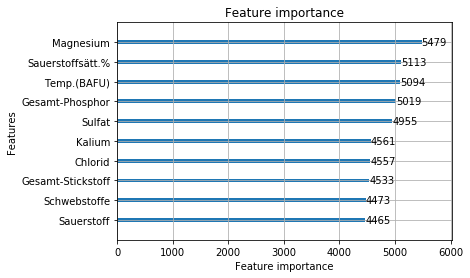

In [83]:
print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()